<a href="https://colab.research.google.com/github/jsmazorra/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Johan_Mazorra_LS_DS13_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# Let's start by importing the data.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-19 03:54:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-19 03:54:37 (278 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [2]:
# We're going to organize the data same as the last assignment.
import pandas as pd
import numpy as np


vd = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

vd.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
# We're going to replace the '?' values into NaNs so it could be more convenient in the future functions.
vd = vd.replace({"y": 1, "n": 0, "?": np.NaN})
vd.head(15)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [4]:
# Now I'm going to remove the NaN values from the 'crime' column.
y = vd['crime'][~pd.isnull(vd['crime'])]

y.head(20)

0     1.0
1     1.0
2     1.0
3     0.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     0.0
10    1.0
11    1.0
12    0.0
13    0.0
16    0.0
17    0.0
18    1.0
19    0.0
20    0.0
22    0.0
Name: crime, dtype: float64

In [42]:
# Next, I'm going to create a function using the scipy library in order to find the confidence interval.
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt

def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m = np.mean(a)
    se = scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return print('mean:', m), print('lower bound', m-h), print('higher bound:', m+h);

# Here are the results for the confidence interval in the output.
crime = y.sample(40)

confidence_interval(crime);

mean: 0.7
lower bound 0.5515750651497277
higher bound: 0.8484249348502723


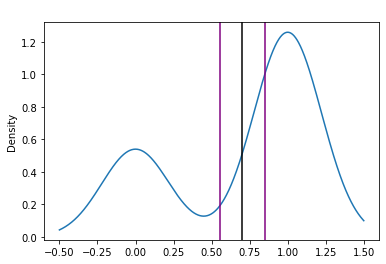

In [44]:
# Now we're going to create a visualization of the confidence interval using matplot by using graph.
crime.plot.density()
plt.title('Crime Bill Distribution', color='white')
plt.axvline(x=0.552, color='purple') # line for the lower bound
plt.axvline(x=0.7, color='black') # line for the mean
plt.axvline(x=0.850, color='purple') # line for the higher bound
plt.show()

# Conclusion

As stated by the data, there's a 95% confidence level that a sample mean will fall between the range of .338 to .662. Which in other words this states that it is 95% likely that, if there was a new sample to be presented, that anywhere from 33.8% to 66.2% of congressmen would vote in favor of the crime bill.

# **Chi-Squared Test**

---



In [34]:
# Let's begin by importing the data for breast cancer.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data

--2020-02-19 04:12:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18654 (18K) [application/x-httpd-php]
Saving to: ‘breast-cancer.data.1’

breast-cancer.data. 100%[===================>]  18.22K  --.-KB/s    in 0.06s   

2020-02-19 04:12:43 (293 KB/s) - ‘breast-cancer.data.1’ saved [18654/18654]



In [35]:
# Then we're going to organize the dataframe and its columns.
column_names = ["class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]

bc = pd.read_csv("breast-cancer.data", names=column_names)

print(bc.shape)
bc.head()

(286, 10)


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [36]:
# Now we're going to create a contigency table.
cont_table = pd.DataFrame(pd.crosstab(bc['menopause'], bc['tumor-size'], margins=True).values)
cont_table.index = ['premeno', 'ge40', 'lt40', 'meno']

print(cont_table.shape)
cont_table.head()

(4, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
premeno,4,13,15,23,19,28,6,13,2,2,4,129
ge40,0,1,2,2,0,2,0,0,0,0,0,7
lt40,4,14,13,25,35,30,13,9,1,2,4,150
meno,8,28,30,50,54,60,19,22,3,4,8,286


In [37]:
# Then we're going to add all the sums for the 'ge40' and 'lt40' rows.
ge40_sums = cont_table.iloc[0:3,3]
lt40_sums = cont_table.iloc[3,0:3]

print(ge40_sums)
print(lt40_sums)

premeno    23
ge40        2
lt40       25
Name: 3, dtype: int64
0     8
1    28
2    30
Name: meno, dtype: int64


In [38]:
all_entries = bc.shape[0]
all_entries

286

In [39]:
# Here's the chi-squared expected data.
expected = []
for i in range(len(ge40_sums)):
  expected_row = []
  for col in lt40_sums:
    expected_val = col * ge40_sums[i]/all_entries
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = pd.DataFrame(expected)
print(expected.shape)
expected

(3, 3)


,0,1,2
0,0.643357,2.251748,2.412587
1,0.055944,0.195804,0.209790
2,0.699301,2.447552,2.622378


In [43]:
# Now for the observed data.
observed = pd.DataFrame(pd.crosstab(bc['menopause'], bc['tumor-size']).values)
chi_squared = ((observed - expected)**2/(expected)).sum()

# Finally here's the result of the chi-squared test for this data.
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
expected = pd.DataFrame(expected)
print(f'Chi-Squared: {chi_squared}\nP-value: {p_value}\nDegrees of Freedom: {dof}')
expected

Chi-Squared: 13.351206469477496
P-value: 0.861811944952152
Degrees of Freedom: 20


,0,1,2,3,4,5,6,7,8,9,10
0,3.608392,12.629371,13.531469,22.552448,24.356643,27.062937,8.569930,9.923077,1.353147,1.804196,3.608392
1,0.195804,0.685315,0.734266,1.223776,1.321678,1.468531,0.465035,0.538462,0.073427,0.097902,0.195804
2,4.195804,14.685315,15.734266,26.223776,28.321678,31.468531,9.965035,11.538462,1.573427,2.097902,4.195804


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)